In [1]:
import numpy as np
import matplotlib.pyplot as plt

# FUNCIONES DE ACTIVACION Y SUS DERIVADAS

## Clases de cada funcion (contiene su funcion y su derivada)

In [2]:
class activationFunction:
    """
    Class for activation functions meant to be used on Neural Networks
    All the activation functions and its derivatives are available on the subclases
    Subclasses:
    Swish()
    Relu()
    Purelin()
    Logsig()
    Tansig()
    Radbas()
    Tribas()
    RadBasN()
    HardLim()
    HardLims()
    SatLin()
    SatLins()
    Softmax()
    LeakyRelu()
    ELU()
    GELU()
    PReLU()
    SELU()
    SiLU()
    Softplus()
    """
    def function(self,x):
        """Activation function"""
        raise NotImplementedError("This is only the base function, the implementation of this is on any of the other functions, for more information check the class DOCSTRING")
    def derivative(self,x):
        """Derivative of the activation function"""
        raise NotImplementedError("This is only the base function, the implementation of this is on any of the other functions, for more information check the class DOCSTRING")
    def active(self):
        raise NotImplementedError("This is only the base function, the implementation of this is on any of the other functions, for more information check the class DOCSTRING")

In [3]:
class Swish(activationFunction):
    """Scaled Exponential Linear Unit With a Shift function"""
    def __init__(self, beta=1):
        self.beta = beta
    def function(self, x):
        return x * (1 / (1 + np.exp(-self.beta * x)))
    def derivative(self, x):
        return (self.beta * self.function(x)) + (1 / (1 + np.exp(-self.beta * x))) * (1 - self.beta * self.function(x))
    def active(self):
        out = [-float('inf'), float('inf')]
        return out

In [4]:
class Relu(activationFunction):
    """Rectified linear unit function (ReLU)"""
    def function(self, x):
        return np.maximum(0,x)
    def derivative(self, x):
        return np.where(x>0,1,0)

In [5]:
class Purelin(activationFunction):
    """Linear (Identity) function"""
    def function(self,x):
      return x
    def derivative(self,x):
      return np.ones_like(x)

In [6]:
class Logsig(activationFunction):
    """Logistic function"""
    def function(self, x):
      return 1 / (1 + np.exp(-x))
    def derivative(self,x):
        return self.function(x) * (1 - self.function(x))
    def active(self):
        out = [-4.0, 4.0]
        return out

In [7]:
class Tansig(activationFunction):
    """Hyperbolic function"""
    def function(self,x):
        return np.tanh(x)
    def derivative(self,x):
        return  1- np.tanh(x)**2

In [8]:
class Radbas(activationFunction):
    """Gaussian function"""
    def function(self,x):
        return np.exp(-x**2)
    def derivative(self,x):
        return -2 * x * np.exp(-x**2)

In [9]:
class Tribas(activationFunction):
    """Triangular basis function"""
    def function(self, x):
      return np.maximum(0, 1 - np.abs(x))
    def derivative(self, x):
      return np.where(np.abs(x) < 1, -1, 0)

In [10]:
class RadBasN(activationFunction):
    """Normalized radial basis function"""
    def __init__(self, sigma=1):
        """
        PARAMETERS
        sigma : float by default 1
        """
        self.sigma = sigma

    def function(self, x):
      return np.exp(-0.5 * (x / self.sigma)**2)

    def derivative(self, x):
      return -x / self.sigma**2 * np.exp(-0.5 * (x / self.sigma)**2)

In [11]:
class HardLim(activationFunction):
    """Hard limit function"""
    def function(self, x):
        return np.where(x >= 0, 1, 0)

    def derivative(self, x):
        return np.zeros_like(x)

In [12]:
class HardLims(activationFunction):
    """Symmetric hard limit function"""
    def function(self, x):
        return np.where(x >= 0, 1, -1)
    def derivative(self, x):
        return np.zeros_like(x)

In [13]:
class SatLin(activationFunction):
    """Saturatin linear function"""
    def function(self, x):
        return np.clip(x, 0, None)

    def derivative(self, x):
        return np.where(x >= 0, 1, 0)

In [14]:
class SatLins(activationFunction):
    """Symmetric saturating function"""
    def function(self, x):
        return np.clip(x, -1, 1)

    def derivative(self, x):
        return np.where(np.logical_and(x >= -1, x <= 1), 1, 0)

In [15]:
class Softmax(activationFunction):
    """Normalized exponential function (softmax)"""
    def function(self, x):
        exps = np.exp(x)
        sums = np.sum(exps)
        return np.divide(exps, sums)
    def derivative(self, x):
        raise NotImplementedError("La derivada de Softmax no se utiliza típicamente en el entrenamiento de redes neuronales.")

In [16]:
class LeakyRelu(activationFunction):
    """Leaky rectified linear unit function (leakyRelu)"""
    def function(self, x):
        return np.where(x>0,x,1e-2*x)
    def derivative(self, x):
        return np.where(x>0,1,1e-2)

In [17]:
class ELU(activationFunction):
    """Exponential Linear Unit function (ELU)"""
    def __init__(self, alpha=1):
        """
        PARAMETERS:
        alpha = float by default 1
        """
        self.alpha=alpha
    def function(self, x):
        return np.where(x>0,x,self.alpha*(np.exp(x)-1))
    def derivative(self, x):
        return np.where(x>0,1,self.alpha*np.exp(x))

In [18]:
class GELU(activationFunction):
    """Gaussian Error Linear Unit function (GELU)"""
    def function(self, x):
        return 0.5 * x * (1 + erf(x / np.sqrt(2)))
    def derivative(self, x):
        return 0.5 * (1 + erf(x / np.sqrt(2))) + (x / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

In [19]:
class PReLU(activationFunction):
    """Parametric rectified linear unit function (PReLU)"""
    def __init__(self, alpha=1e-1):
        """
        PARAMETERS
        alpha : float by default 1e-1
        """
        self.alpha=alpha
    def function(self, x):
        return np.where(x<0,self.alpha*x,x)
    def derivative(self, x):
        return np.where(x<0,self.alpha,1)

In [20]:
class SELU(activationFunction):
    """Scaled exponential linear unit function (SELU)"""
    def __init__(self, lamb= 1.0507, alpha=1.67326):
        """
        PARAMETERS
        lamb : float by default 1.0507
        alpha : float by default 1.67326
        Both are suposed to be always that value so it's recomended to not change them
        """
        self.lamb=lamb
        self.alpha=alpha
    def function(self, x):
        return self.lamb * np.where(x<0, self.alpha*(np.exp(x)-1),x)
    def derivative(self, x):
        return self.lamb * np.where(x<0, self.alpha*np.exp(x),1)

In [21]:
class SiLU(activationFunction):
    """Sigmoid linear unit function (SiLU)"""
    def function(self, x):
        return (x / (1 + np.exp(-x)))
    def derivative(self, x):
        return (1 + np.exp(-x) + x*np.exp(-x))/((1+np.exp(-x))**2)

In [22]:
class Softplus(activationFunction):
    """Smooth approximation ReLU function"""
    def function(self, x):
        return np.log(1 + np.exp(x))
    def derivative(self, x):
        return 1 / (1+np.exp(-x))

## Seccion de pruebas de las funciones

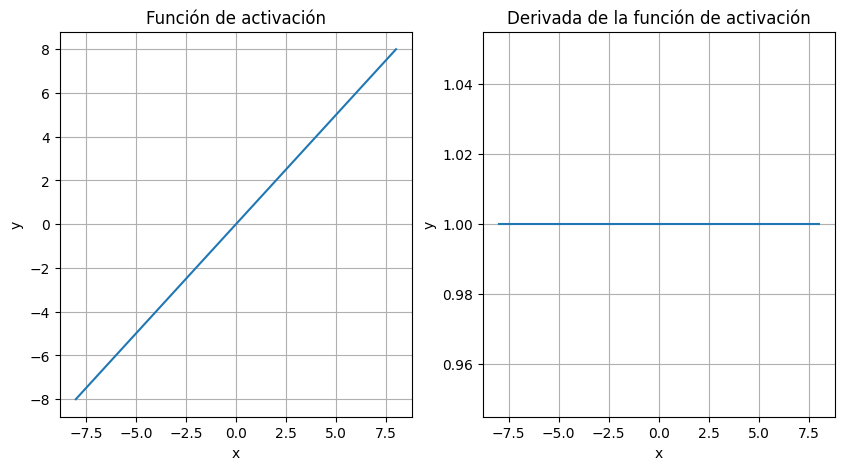

In [23]:
a = activationFunction()
funcion = Purelin()
x_values = np.linspace(-8, 8, 100)
y_values = funcion.function(x_values)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x_values, y_values)
plt.title('Función de activación')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

y_values = funcion.derivative(x_values)
plt.subplot(1, 2, 2)
plt.plot(x_values, y_values)
plt.title('Derivada de la función de activación')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()

# Funciones de error

In [24]:
class ErrorFunctions:
    @staticmethod
    def MSE(y_true, y_pred):
        """
        Calculate the mean squared error between true and predicted values.

        Parameters:
        y_true: numpy.ndarray
            True values
        y_pred: numpy.ndarray
            Predicted values

        Returns:
        float
            Mean squared error
        """
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        return np.mean((y_true - y_pred) ** 2)
    
    @staticmethod
    def MAE(y_true, y_pred):
        """
        Calculate the mean absolute error between true and predicted values.

        Parameters:
        y_true: numpy.ndarray
            True values
        y_pred: numpy.ndarray
            Predicted values

        Returns:
        float
            Mean absolute error
        """
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        return np.mean(np.abs(y_true - y_pred))

    @staticmethod
    def SSE(y_true, y_pred):
        """
        Calculate the sum of squared errors between true and predicted values.

        Parameters:
        y_true: numpy.ndarray
            True values
        y_pred: numpy.ndarray
            Predicted values

        Returns:
        float
            Sum of squared errors
        """
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        return np.sum((y_true - y_pred) ** 2)

# ESTRUCTURA DE LA RED NEURONAL

In [25]:
class NeuralNetwork:
    """Class for the structure of a Neural Network"""
    def __init__(self, input_size, layer_sizes, output_size, activation_funcs, wInit='random'):
        """
        Parameters:
        input_size: int 
            Defines the size of the input layer
        layer_sizes: int array 
            Defines the sizes of the ocult layers
        output_size: int 
            Defines the size of the output layer
        activation_funcs: activationFunction class array 
            Defines the activation function per layer
        """
        self.input_size = input_size
        self.layer_sizes = [input_size] + layer_sizes + [output_size]  # Incluir el tamaño de la capa de entrada y de salida
        self.output_size = output_size
        self.activation_funcs = activation_funcs

        self.num_layers = len(self.layer_sizes)
        num_weights = 0
        for i in range(self.num_layers-1):
            num_weights += (self.layer_sizes[i]*self.layer_sizes[i+1])+ self.layer_sizes[i+1] 
        if wInit == 'random':    
            self.weights = np.random.randn(num_weights)#Inicializacion aleatoria de los pesos    
        elif wInit == 'nguyen':
            self.weights = np.random.randn(num_weights)#Inicializacion aleatoria de los pesos    
            raise NotImplementedError("La inicializacion por el metodo nguyen-widrow aun esta en proceso, se implementara en futuras versiones")
            self.weights = np.random.randn(num_weights)#Inicializacion aleatoria de los pesos 
            # Nuguyen-Widrow algorithm for generation weights and biases
            for i in range(self.num_layers-1):
                start_index,end_index = self.calculate_weight_indixes(i)
                ra = self.activation_funcs[i].active()
                G = 0.7 * np.sqrt(self.layer_sizes[i+1]) ** (1 / self.layer_sizes[i])
                if (not np.isinf(ra[0])) and (not np.isinf(ra[1])):
                    vw = np.random.randn(self.layer_sizes[i+1], self.layer_sizes[i])
                    a = vw / np.linalg.norm(vw)
                    a = G * a
                    beta = np.arange(ra[0], ra[1] + (ra[1]-ra[0])/(self.layer_sizes[i+1]-1+1e-12), (ra[1]-ra[0])/(self.layer_sizes[i+1]-1+1e-12)).reshape(-1, 1)
                    a = np.hstack((a, G * (np.sign(a[:, 0]) * beta))) 
                    a = a.flatten()
                    self.weights[start_index:end_index] = a
                else:
                    self.weights[start_index:end_index] = G * np.random.randn(self.layer_sizes[i+1] * (self.layer_sizes[i] + 1))
                
        self.n_outputs = []  # Lista para almacenar las salidas antes de la función de activación
        self.a_outputs = []
        
    def forwardPass(self, inputs):
        start_index = 0
        outputs = np.array(inputs)
        self.n_outputs = [inputs] #La primera n siempre es igual a los inputs
        self.a_outputs = []
        # Iterar sobre cada capa de la red
        for i in range(self.num_layers-1):
            # Extraer los pesos para la capa actual
            end_index = start_index + self.layer_sizes[i+1] * (self.layer_sizes[i] + 1) # Agregamos 1 para los sesgos
            layer_weights = self.weights[start_index:end_index]
            layer_weights = layer_weights.reshape(self.layer_sizes[i+1], self.layer_sizes[i]+1) # +1 para incluir los sesgos
            
            start_index = end_index

            # Cálculo del producto punto entre los pesos y el input aumentado por el sesgo
            pe = np.vstack((outputs,np.ones((1,outputs.shape[1]))))
            layer_output = np.dot(layer_weights,pe)
            self.n_outputs.append(layer_output)
            # Aplicación de la función de activación correspondiente
            layer_output = self.activation_funcs[i].function(layer_output)
            self.a_outputs.append(layer_output)
            outputs = layer_output
            
        return outputs


    def backwardPass(self, targets):
        gradients = np.array([])
        #targets_np = np.array(targets)
        #num_samples = targets_np.shape[0]
        e = targets - self.a_outputs[-1]
        ge = -2*e
        delta = ge * self.activation_funcs[-1].derivative(np.array(self.n_outputs[-1]))
        ae = np.vstack((self.a_outputs[-2],np.ones((1,self.a_outputs[-2].shape[1]))))
        ge = np.dot(delta,ae.T)
        gradients = np.concatenate((ge.flatten(),gradients))
    
        for i in range(self.num_layers-2, 0, -1):
            fdx = self.activation_funcs[i-1].derivative(np.array(self.n_outputs[i]))
            start_index,end_index = self.calculate_weight_indixes(i)
            layer_weights = self.weights[start_index:end_index]
            layer_weights = layer_weights.reshape(self.layer_sizes[i+1], self.layer_sizes[i]+1) # +1 para incluir los sesgos
            layer_weights = layer_weights[:, :-1] #Ignorar la columna de sesgos
            delta = fdx * np.dot(layer_weights.T,delta)
            ae = np.vstack((self.a_outputs[i-1],np.ones((1,self.a_outputs[i-1].shape[1]))))
            ge = np.dot(delta,ae.T)
            gradients = np.concatenate((ge.flatten(),gradients))
        return gradients
    

    def calculate_weight_indixes(self, layer_index):
        """Calculates the start and end indices of the weights for the specified layer."""
        start_index = 0
        end_index = 0
        for i in range(layer_index):
            start_index += self.layer_sizes[i] * (self.layer_sizes[i+1] + 1)  
            
        # Calcular el índice de fin sumando el tamaño de la capa actual multiplicado por el tamaño de la capa anterior (sin incluir sesgos)
        end_index = start_index + self.layer_sizes[layer_index] * (self.layer_sizes[layer_index+1] + 1)
        
        return start_index, end_index
        
    def error(self,targets,error_func):
        """
        Calculate the error based on the inputs, outputs, and error function specified.

        Parameters:
        inputs: numpy.ndarray
            Input data
        outputs: numpy.ndarray
            Output data
        error_func: function
            Error function to use (e.g., mean squared error, mean absolute error, etc.)

        Returns:
        float
            Error value calculated using the specified error function.
        """
        predicted_outputs = self.a_outputs[-1]
        return error_func(targets, predicted_outputs)

# Optimizadores

In [30]:
class Optimizer():
    """
    Class for the optimizers based on two different algorithms

    RMSProp()
    AdamW() 
    """
    def __init__(self,lr:float,maxEpochs:int,goal:float,mingrad:float,nn: NeuralNetwork,
                 inputs,targets,error_fun,show:int =1,consecutive_epochs:int =10,
                 num_batch: int=1)->None:  #Aqui probablemente se pueda agregar cosas como el batch size, si es categorico por ejemplo
        self.name = "DEFAULT"
        self.lr = lr
        self.num_batch = num_batch
        self.maxEpochs = maxEpochs
        self.goal = goal
        self.mingrad = mingrad
        self.show = show
        self.inputs = inputs
        self.targets = targets
        self.error_fun = error_fun
        self.consecutive_epochs = consecutive_epochs
        self.nn = nn
        
    def optimize(self):
        this = self.name
        stop = ""
        epochs = []
        perfs  = []
        print("\n")
        # Train
        for epoch in range(self.maxEpochs+1):
            # Performance and Gradient
            outputs = self.nn.forwardPass(self.inputs)
            gX = self.nn.backwardPass(self.targets)
            perf = self.nn.error(self.targets, self.error_fun)

            normgX = np.linalg.norm(gX)  
            
            # Stopping criteria
            if np.all(perf <= self.goal):
                stop = "Performance goal met"
            elif epoch == self.maxEpochs:
                stop = "Maximum epoch reached, performance goal was not met"
            elif normgX < self.mingrad:
                stop = "Minimum gradient reached, performance goal was not met"

            # Progress
            if (np.fmod(epoch,self.show) == 0 or len(stop) != 0):
                print(this,end = ": ")
                if np.isfinite(self.maxEpochs):
                    print("Epoch ",epoch, "/", self.maxEpochs,end = " ")
                if np.isfinite(self.goal):
                    print(", Performance %8.3e" % perf, "/", self.goal, end = " ")
                if np.isfinite(self.mingrad):
                    print(", Gradient %8.3e" % normgX, "/", self.mingrad)

                
                if len(stop) != 0:
                    print("\n",this,":",stop,"\n")
                    break
            epochs = np.append(epochs,epoch)
            perfs = np.append(perfs,perf)
            self.train(gX)
            
        return perfs, epochs
    def train(self):
        raise NotImplementedError("No se ha definido el optimizador, esta es la clase base")
    
    


In [27]:
class RmsProp(Optimizer):
    def __init__(self, nn: NeuralNetwork, inputs, targets,lr=1e-3, num_batch=1, maxEpochs=500, goal=1e-8, 
                 mingrad=1e-11, show=1, error_fun=ErrorFunctions.SSE, consecutive_epochs=10,
                 WDecay=0,alpha=0.99,centered=False,momentum=0.6) -> None:
        super().__init__(lr, num_batch, maxEpochs, goal, mingrad, show, inputs, targets, error_fun, consecutive_epochs,nn)
        self.name = "trainRMSPROP"
        #Initial data
        self.v = 0
        self.vh = 0
        self.b = 0
        self.gAvg = 0
        self.WDecay = WDecay
        self.alpha = alpha
        self.centered = centered
        self.momemtum = momentum
        
    def train(self,gX):
        # RMSProp
        if self.WDecay != 0:
            gX = gX + gX*self.WDecay
        self.v = self.alpha*self.v + ((1-self.self.alpha)*(gX**2))
        self.vh = self.v
        if self.centered:
            self.gAvg = self.gAvg*self.alpha + ((1-self.alpha)*gX)
            self.vh = self.vh - self.gAvg**2
        if self.momentum > 0:
            self.b = self.momentum*self.b + gX/((self.vh**(1/2))+1e-8)
            dX = -self.lr*self.b
            self.weights += dX
        else:
            dX = -self.lr*(gX/((self.vh**(1/2))+1e-8))
            self.weights += dX
        return 0

# Main

In [32]:
def main():
    activationFunction() #SOLO ES PARA VER LA DOCUMENTACION 
    neural_network = NeuralNetwork(input_size = 2,
                                   layer_sizes = [2],
                                   output_size = 1,
                                   activation_funcs = [Swish(),Logsig()],
                                   wInit = 'random'
                                  )
    inputs = [[0, 0, 1, 1],
             [0, 1, 0, 1]]
    targets = [0, 1, 1, 0]
    print(f"Pesos antes: {neural_network.weights}")
    
    Optimizador = RmsProp(nn=neural_network,
                          inputs=inputs,
                          targets=targets,
                          lr=1e-4,
                          maxEpochs=1000,
                          show=200)
    print(type(neural_network))
    print(type(Optimizador.nn))
    return 0
    perfs,epochs = Optimizador.optimize()
    
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, perfs)
    plt.title('Performance')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()
    
    print(f"Pesos despues: {neural_network.weights}")
    outputs = neural_network.forwardPass(inputs)
    print(f"Salida:{outputs}")
    print("Predicción binaria:")
    for fila in outputs.T:  # Iterar sobre las filas de la matriz de salida
        for valor in fila:
            if valor > 0.5:
                print("1", end=" ")
            else:
                print("0", end=" ")
    resultado_esperado = [0, 1, 1, 0]
    print("\nResultado esperado:\n ", resultado_esperado)

# DO MAIN

In [33]:
if __name__ == '__main__':
    main()

Pesos antes: [-0.83493965  1.40413469 -0.23658791  1.94655123 -0.18608732  0.65351149
 -0.69784569  0.72400951  0.30753998]
<class 'float'>
